In [25]:
import sys
sys.path.append("../utils/")

In [26]:
from backend_manager import BackendManager
from runner import Runner
from data_collector import DataCollector
from filter_on_kpis import FilterOnKPIs
from runner_competing import RunnerCompeting
from case_duration_manager import CaseDurationsManager
from rank_variants import RankVariants
from measurements_visualizer import MeasurementsVisualizer
from measure_and_rank import measure_and_rank
from discover_pn import DiscoverPN

In [27]:
import os
import time
import shutil
import pandas as pd
import pm4py

#### 01. Backend -NA

In [28]:
submit_cmd = "sbatch submit.sh"
#bm = BackendManager("login18-1.hpc.itc.rwth-aachen.de", "as641651", submit_cmd)
bm = BackendManager("login18-1.hpc.itc.rwth-aachen.de", "as641651")
bm.connect()
#bm = None

#### 02. Runner

In [29]:
#args = ["75","75","8","75","75"]
args = ["1000","1000","500","1000","1000"]

exp_dir = "../Matrix-Chain-4/variants-linnea/"
if bm:
    exp_dir = "~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea"
threads = 10
runner = Runner("MC", exp_dir, args, threads=threads, backend=bm)

#### 03. Job name - NA

In [30]:
if bm:
    args_dir_name = runner.args_dir.split('/')[-1]
    job_name = "{}_T{}".format(args_dir_name, threads)
    job_name

#### 04. DataCollector

In [31]:
if bm:
    exp_dir_local = "../Matrix-Chain-4/variants-linnea/"
    local_data_dir = os.path.join(exp_dir_local, "cluster-experiments", "{}".format(args_dir_name))
    if os.path.exists(local_data_dir):
        shutil.rmtree(local_data_dir)
    os.makedirs(local_data_dir)
    dc = DataCollector(local_data_dir, runner.args_dir, bm)
else:
    dc = DataCollector(runner.args_dir)

#### 05. Look for already available data

In [32]:
case_table = dc.get_case_table()
case_table

scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/1000_1000_500_1000_1000/case_table.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/1000_1000_500_1000_1000
b''


,case:concept:name,case:flops,case:num_kernels
0,algorithm0,3.000000e+09,3
1,algorithm2,4.000000e+09,3
2,algorithm4,5.000000e+09,3
3,algorithm1,3.000000e+09,3
4,algorithm5,5.000000e+09,3
5,algorithm3,4.000000e+09,3


In [33]:
cm = CaseDurationsManager()
cm.collect_case_durations(dc)

scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/1000_1000_500_1000_1000/mean_ranks.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/1000_1000_500_1000_1000
b''
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/1000_1000_500_1000_1000/run_times_competing_0.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/1000_1000_500_1000_1000
b''
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/1000_1000_500_1000_1000/run_times_competing_1.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/1000_1000_500_1000_1000
b''
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/1000_1000_500_1000_1000/run_times_competing_2.csv ../Matrix-Chain-4/variants-linnea/cluster-experim

In [34]:
#cm.case_durations.head()

#### 05. Generate Experiments

In [35]:
ret = runner.generate_experiments()
ret

source ~/.analyzer; cd ~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea; python generate-variants-linnea.py 1000 1000 500 1000 1000 --threads=10;
['New solution:................3e+09\n', 'No further generation steps possible.\n', '----------------------------------\n', 'Number of nodes:                 8\n', 'Solution nodes:                  1\n', 'Data:                        4e+06\n', 'Best solution:               3e+09\n', 'Intensity:                     750\n', 'Number of algorithms:            6\n', 'Generated Variants.\n']


0

#### 06. Single-run Experiment

In [36]:
ret = runner.run_experiments()
ret

source ~/.analyzer; cd ~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/1000_1000_500_1000_1000; julia runner.jl;
Running experiments in the backend.


0

In [13]:
if bm:
    while bm.check_slrum_status(job_name) != 0:
        print("Waiting for Job to complete.")
        time.sleep(5)

['             JOBID PARTITION                           NAME     USER    STATE       TIME TIME_LIMI  NODES NODELIST(REASON)\n']


In [14]:
case_table = dc.get_case_table()
measurements = dc.get_all_runtimes_table()

scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/1000_1000_500_1000_1000/run_times.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/1000_1000_500_1000_1000
b''


In [15]:
case_table

,case:concept:name,case:flops,case:num_kernels
0,algorithm0,3.000000e+09,3
1,algorithm2,4.000000e+09,3
2,algorithm4,5.000000e+09,3
3,algorithm1,3.000000e+09,3
4,algorithm5,5.000000e+09,3
5,algorithm3,4.000000e+09,3


In [16]:
measurements.head()

,case:concept:name,concept:name,concept:flops,concept:operation,concept:kernel,timestamp:start,timestamp:end
0,algorithm0,gemm_1e+09,1.000000e+09,tmp3 = (C D),"gemm!('N', 'N', 1.0, ml2, ml3, 0.0, ml4)",1.657300e+09,1.657300e+09
1,algorithm0,gemm_1e+09,1.000000e+09,tmp1 = (A B),"gemm!('N', 'N', 1.0, ml0, ml1, 0.0, ml5)",1.657300e+09,1.657300e+09
2,algorithm0,gemm_1e+09,1.000000e+09,tmp6 = (tmp1 tmp3),"gemm!('N', 'N', 1.0, ml5, ml4, 0.0, ml6)",1.657300e+09,1.657300e+09
3,algorithm2,gemm_1e+09,1.000000e+09,tmp1 = (A B),"gemm!('N', 'N', 1.0, ml0, ml1, 0.0, ml4)",1.657300e+09,1.657300e+09
4,algorithm2,gemm_1e+09,1.000000e+09,tmp4 = (tmp1 C),"gemm!('N', 'N', 1.0, ml4, ml2, 0.0, ml5)",1.657300e+09,1.657300e+09


#### 07. KPI filter

In [17]:
kpi_filter = FilterOnKPIs(case_table, measurements)
kpi_filter.case_table

,case:concept:name,case:timestamp:start,case:timestamp:end,case:duration,case:flops,case:num_kernels,case:rel-flops,case:rel-duration
0,algorithm0,1.657300e+09,1.657300e+09,0.009058,3.000000e+09,3,0.000000,0.082455
1,algorithm2,1.657300e+09,1.657300e+09,0.008368,4.000000e+09,3,0.333333,0.000000
2,algorithm4,1.657300e+09,1.657300e+09,0.011538,5.000000e+09,3,0.666667,0.378825
3,algorithm1,1.657300e+09,1.657300e+09,0.020853,3.000000e+09,3,0.000000,1.491994
4,algorithm5,1.657300e+09,1.657300e+09,0.021451,5.000000e+09,3,0.666667,1.563451
5,algorithm3,1.657300e+09,1.657300e+09,0.010552,4.000000e+09,3,0.333333,0.261012


In [18]:
competing_cases = kpi_filter.filter_on_flops_and_rel_duration(100)
competing_cases

,case:concept:name,case:timestamp:start,case:timestamp:end,case:duration,case:flops,case:num_kernels,case:rel-flops,case:rel-duration
0,algorithm0,1.657300e+09,1.657300e+09,0.009058,3.000000e+09,3,0.000000,0.082455
1,algorithm2,1.657300e+09,1.657300e+09,0.008368,4.000000e+09,3,0.333333,0.000000
2,algorithm4,1.657300e+09,1.657300e+09,0.011538,5.000000e+09,3,0.666667,0.378825
3,algorithm1,1.657300e+09,1.657300e+09,0.020853,3.000000e+09,3,0.000000,1.491994
4,algorithm5,1.657300e+09,1.657300e+09,0.021451,5.000000e+09,3,0.666667,1.563451
5,algorithm3,1.657300e+09,1.657300e+09,0.010552,4.000000e+09,3,0.333333,0.261012


In [19]:
alg_seq_h0 = kpi_filter.get_alg_seq_sorted_on_duration(competing_cases)
alg_seq_h0

['algorithm2',
 'algorithm0',
 'algorithm3',
 'algorithm4',
 'algorithm1',
 'algorithm5']

#### 08. Runner Competing and compute ranks

In [20]:
runner_competing = RunnerCompeting(alg_seq_h0, runner.args_dir,
                                          threads=threads, backend=bm)

In [21]:
# Clear previous measurements if available before re-running
dc.delete_competing_measurements()
dc.delete_ranks()

rep_steps = 3
eps=0.03
ret = runner_competing.compute_ranks(rep_steps=rep_steps, eps=eps, max_rep=30)
ret

removing  ../Matrix-Chain-4/variants-linnea/cluster-experiments/1000_1000_500_1000_1000/run_times_competing_4.csv
removing  ../Matrix-Chain-4/variants-linnea/cluster-experiments/1000_1000_500_1000_1000/run_times_competing_2.csv
removing  ../Matrix-Chain-4/variants-linnea/cluster-experiments/1000_1000_500_1000_1000/run_times_competing_3.csv
removing  ../Matrix-Chain-4/variants-linnea/cluster-experiments/1000_1000_500_1000_1000/run_times_competing_1.csv
removing  ../Matrix-Chain-4/variants-linnea/cluster-experiments/1000_1000_500_1000_1000/run_times_competing_0.csv
rm -rf ~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/1000_1000_500_1000_1000/*_competing_*
Error:  1
removing  ../Matrix-Chain-4/variants-linnea/cluster-experiments/1000_1000_500_1000_1000/mean_ranks.csv
rm -rf ~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/1000_1000_500_1000_1000/*ranks.csv
Error:  1
source ~/.analyzer; cd ~/PhD/performance-analyazer/Exp

0

In [22]:
if bm:
    while bm.check_slrum_status(job_name) != 0:
        print("Waiting for Job to complete.")
        time.sleep(5)

['             JOBID PARTITION                           NAME     USER    STATE       TIME TIME_LIMI  NODES NODELIST(REASON)\n']


#### 09. View Ranks

In [23]:
ranks = dc.get_ranks()
ranks

scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/1000_1000_500_1000_1000/ranks.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/1000_1000_500_1000_1000
b''


,case:concept:name,case:rank:q95-q5,case:rank:q90-q10,case:rank:q85-q15,case:rank:q80-q20,case:rank:q75-q25,case:rank:q70-q30,case:rank:q65-q35
0,algorithm0,0,0,0,0,0,0,0
1,algorithm1,0,0,0,0,0,0,0
2,algorithm2,0,0,1,1,1,1,1
3,algorithm3,0,0,1,1,1,1,1
4,algorithm4,0,0,1,1,1,1,1
5,algorithm5,0,0,1,1,1,1,1


In [24]:
mean_ranks = dc.get_mean_ranks()
mean_ranks

scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/1000_1000_500_1000_1000/mean_ranks.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/1000_1000_500_1000_1000
b''


,case:concept:name,case:mean-rank,case:mean-rank.1,case:mean-rank.2,case:mean-rank.3,case:mean-rank.4
0,algorithm2,0,0.857143,0.428571,0.571429,0.714286
1,algorithm0,1,0.000000,0.000000,0.000000,0.000000
2,algorithm3,2,0.857143,0.428571,0.571429,0.714286
3,algorithm4,3,1.285714,0.714286,0.571429,0.714286
4,algorithm1,4,0.857143,0.000000,0.000000,0.000000
5,algorithm5,5,1.285714,0.714286,0.571429,0.714286


#### 10. Get Measurements

In [268]:
num_runs = mean_ranks.shape[1]-2
num_measurements = num_runs*rep_steps
print("Number of measurements per alg: ", num_measurements)

Number of measurements per alg:  15


In [269]:
cm.collect_case_durations(dc)

scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/1000_1000_500_1000_1000/run_times_competing_0.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/1000_1000_500_1000_1000
b''
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/1000_1000_500_1000_1000/run_times_competing_1.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/1000_1000_500_1000_1000
b''
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/1000_1000_500_1000_1000/run_times_competing_2.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/1000_1000_500_1000_1000
b''
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/1000_1000_500_1000_1000/run_times_competing_3.csv ../Matrix-Chain-4/variants-linnea/clus

In [270]:
alg_measurements = cm.get_alg_measurements()

#### 11. Visualize Measurements

In [271]:
#order_ = ['algorithm0', 'algorithm1', 'algorithm2', 'algorithm3', 'algorithm4', 'algorithm5' ]
order_ = ['algorithm1', 'algorithm2', 'algorithm3', 'algorithm5', 'algorithm4', 'algorithm0' ]

In [272]:
#mv = MeasurementsVisualizer(alg_measurements, alg_seq_h0)
#mv = MeasurementsVisualizer(alg_measurements, order_)
mv = MeasurementsVisualizer(alg_measurements, list(ranks['case:concept:name']))

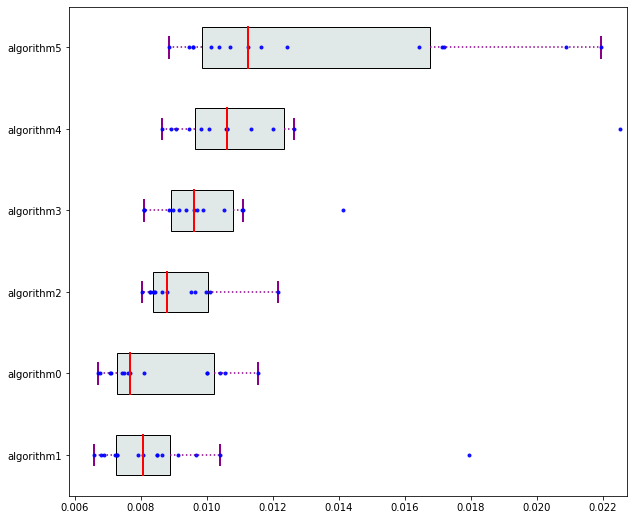

In [273]:
mv.show_measurements_boxplots(outliers=False)

In [274]:
print("Initial Sequence: ", alg_seq_h0)
df = ranks.merge(mean_ranks.iloc[:,[0,-1]], on='case:concept:name')
df = df.merge(competing_cases.iloc[:,[0,-2]], on='case:concept:name')
df

Initial Sequence:  ['algorithm1', 'algorithm2', 'algorithm0', 'algorithm3', 'algorithm4', 'algorithm5']


,case:concept:name,case:rank:q95-q5,case:rank:q90-q10,case:rank:q85-q15,case:rank:q80-q20,case:rank:q75-q25,case:rank:q70-q30,case:rank:q65-q35,case:mean-rank.5,case:rel-flops
0,algorithm1,0,0,0,0,0,0,0,0.000000,0.000000
1,algorithm0,0,0,0,0,0,0,0,0.000000,0.000000
2,algorithm2,0,0,0,0,0,0,0,0.000000,0.333333
3,algorithm3,0,0,0,0,0,0,0,0.000000,0.333333
4,algorithm4,0,0,0,0,0,0,1,0.142857,0.666667
5,algorithm5,0,0,0,0,0,0,1,0.142857,0.666667


In [220]:
#competing_cases

### Visualize Process

In [64]:
event_table = None
for i in range(num_runs):
    event_table = pd.concat([event_table, dc.get_runtimes_competing_table(i)])
#event_table

In [65]:
pn = DiscoverPN(event_table)

In [66]:
def visualize_pn(pn, algs,kernels=True):
    filtered_log = pm4py.filter_log(lambda x: x.attributes['concept:name'].split('_')[0] in algs, pn.event_log)
    if kernels:
        net, im, fm = pn.inductive_miner(activity='concept:operation',filtered_log=filtered_log)
    else:
        net, im, fm = pn.inductive_miner(filtered_log=filtered_log)
    pn.visualize_pn(net, im, fm)

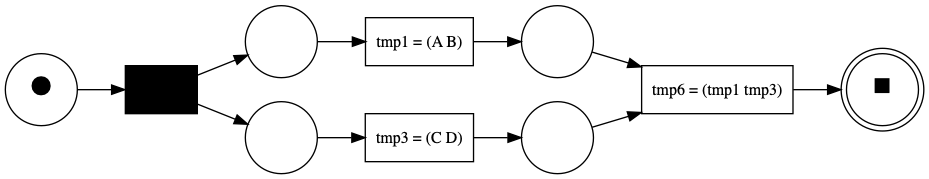

In [72]:
algs = ['algorithm0', 'algorithm1']
visualize_pn(pn,algs)

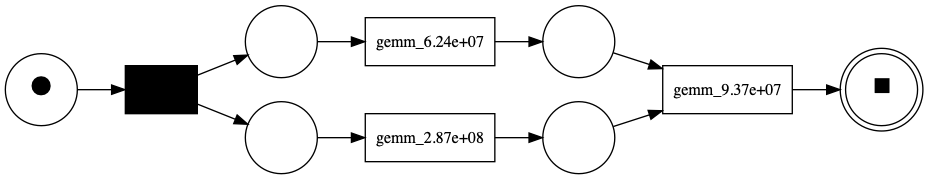

In [73]:
algs = ['algorithm0', 'algorithm1']
visualize_pn(pn,algs, kernels=False)

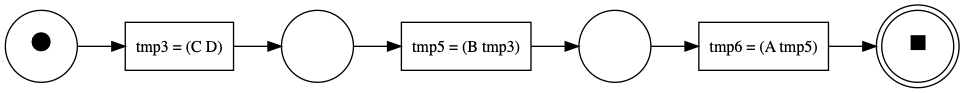

In [67]:
algs = ['algorithm3' ]
visualize_pn(pn,algs)

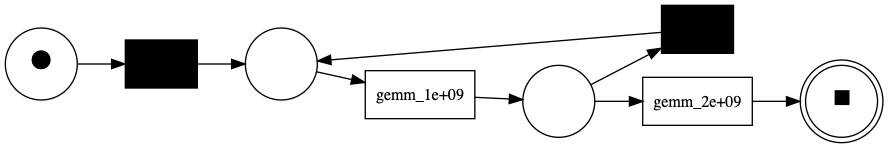

In [68]:
algs = ['algorithm3' ]
visualize_pn(pn,algs, kernels=False)

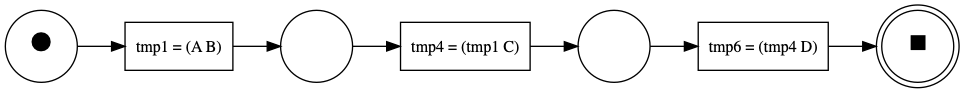

In [69]:
algs = ['algorithm2']
visualize_pn(pn,algs)

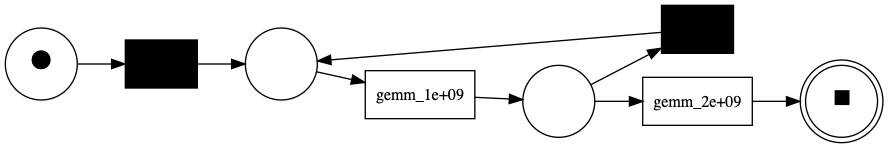

In [70]:
algs = ['algorithm2']
visualize_pn(pn,algs, kernels=False)